In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from dtaidistance import dtw, clustering
from sklearn.cluster import KMeans
import plotly.express as px

In [23]:
df = pd.read_excel('../../data/MERGED_DATA_INTERPOLATED_FINAL2.xlsx', sheet_name='MERGE')
df.head()

,LOC_CODE,DATUM,TIJD,ZS [mg/l],ZICHT [dm],T [oC],SiO2 [umol/L],SALNTT [DIMSLS],PO4 [umol/L],pH [DIMSLS],NO3 [umol/L],NO2 [umol/L],NH4 [umol/L],E [/m],E_method,CHLFa [ug/l],Q,PAR [J/m2d],PAR [kJ/m2d],kPAR_7d,kPAR_14d,DIN,DIN:SRP,DIN:SI,SRP:SI,IM [Jm2d],Agl,Dbr,Ezo,Gde,Oau,Omo,Orh,Osi,Ram,Rse,Tec,Tle,Tni,Tro,Dle,Etr,Gfl,Gsp,Nsc,Pbi,Pbr,Pha,Stu,Kgl,Oro,Tor,Cdi,Cra,Ore,Ata,Cfu,Cgr,Lan,Pcl,Pmi,Pos,Pse,Cden,Aco,Dip,Csu,Mnu,Pco,Cdeb,Cwa,Pba,Dac,Ptr,Lun,Nsi,Rst,Pst,Acn,Tno,Ccu,Pan,Gfa,Hta,Dsp,Psu,Cei,Ndi,Cda,Dro,Cha,Pac,Cau,Coc,Pte,Edu,Mpe,Pde,Plo,Dpu,Rte,Fja,Hak,Mhe,Dno,Dat,interpolated_columns
0,DANTZGT,1990-01-10,15:00:00,135.0,2.0,4.0,20.178571,29.19,1.645161,7.8,37.571429,3.714286,14.071429,0.751180,2012a,1.3,100,450000.0,450.0,513.000000,NaN,55.357143,33.648459,2.743363,0.081530,4.496419e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
1,DANTZGT,1990-02-06,13:40:00,295.0,0.5,6.0,19.803571,27.37,1.177419,7.9,63.428571,2.892857,11.357143,11.391822,2012b,11.2,603,2713500.0,2713.5,1737.000000,1497.857143,77.678571,87.278775,3.945211,0.059029,2.713500e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['SiO2 [umol/L]', 'PO4 [umol/L]', 'pH [DIMSLS]..."
2,DANTZGT,1990-03-08,13:45:00,103.0,3.0,7.3,19.428571,24.99,0.709677,8.0,89.285714,2.071429,8.642857,1.364080,2012a,21.1,543,2443500.0,2443.5,2949.428571,2865.857143,100.000000,140.909091,5.147059,0.036528,2.443494e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,DANTZGT,1990-04-04,10:00:00,113.0,3.0,8.2,6.285714,28.79,0.806452,8.1,40.000000,2.000000,6.428571,1.037580,2012a,25.0,1491,6709500.0,6709.5,6508.285714,5926.821429,48.428571,60.051429,7.704545,0.128299,6.709149e+06,3.271842,4.748777,3.572755,3.572755,4.313065,3.748808,3.572755,3.873785,3.271842,3.271842,3.572755,3.572755,4.669596,4.475787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
4,DANTZGT,1990-05-09,15:30:00,20.0,11.0,17.4,1.714286,33.28,1.161290,8.3,0.214286,0.142857,1.928571,0.738760,2012a,10.2,1290,5805000.0,5805.0,9470.571429,9416.892857,2.285714,1.968254,1.333333,0.677419,5.799802e+06,4.669596,NaN,3.271842,3.970672,NaN,2.670246,1.973128,NaN,NaN,5.192467,NaN,NaN,NaN,4.012035,NaN,NaN,NaN,3.669689,3.271842,3.669689,NaN,NaN,NaN,1.973128,2.816241,1.973128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [24]:
df.columns

Index(['LOC_CODE', 'DATUM', 'TIJD', 'ZS [mg/l]', 'ZICHT [dm]', 'T [oC]',
       'SiO2 [umol/L]', 'SALNTT [DIMSLS]', 'PO4 [umol/L]', 'pH [DIMSLS]',
       ...
       'Pde', 'Plo', 'Dpu', 'Rte', 'Fja', 'Hak', 'Mhe', 'Dno', 'Dat',
       'interpolated_columns'],
      dtype='object', length=107)

In [25]:
# rename_dict = {'Acn': 'Actinocyclus normanii', 'Aco': 'Actinocyclus octonarius', 'Agl': 'Asterionella glacialis', 'Ata': 'Alexandrium tamarense', 'Cau': 'Corymbellus aureus', 'Ccu': 'Chaetoceros curvisetus', 'Cda': 'Chaetoceros danicus', 'Cdeb': 'Chaetoceros debilis', 'Cden': 'Chaetoceros densus', 'Cdi': 'Chaetoceros didymus', 'Cei': 'Chaetoceros eibenii', 'Cfu': 'Ceratium fusus', 'Cgr': 'Coscinodiscus granii', 'Cha': 'Chattonella', 'Coc': 'Cochlodinium', 'Cra': 'Coscinodiscus radiatus', 'Csu': 'Chaetoceros subtilis', 'Cwa': 'Coscinodiscus wailesii', 'Dac': 'Dinophysis acuminata', 'Dat': 'Dinophysis acuta', 'Dbr': 'Ditylum brightwellii', 'Dip': 'Diploneis', 'Dle': 'Diplopsalis lenticula', 'Dno': 'Dinophysis norvegica', 'Dpu': 'Detonula pumila', 'Dro': 'Dinophysis rotundata', 'Dsp': 'Dictyocha speculum', 'Edu': 'Eunotogramma dubium', 'Etr': 'Ebria tripartita', 'Ezo': 'Eucampia zodiacus', 'Fja': 'Fibrocapsa japonica', 'Gde': 'Guinardia delicatula', 'Gfa': 'Gyrosigma fasciola', 'Gfl': 'Guinardia flaccida', 'Gsp': 'Gyrodinium spirale', 'Hak': 'Heterosigma akashiwo', 'Hta': 'Helicotheca tamesis', 'Kgl': 'Katodinium glaucum', 'Lan': 'Lauderia annulata', 'Lun': 'Lithodesmium undulatum', 'Mhe': 'Mediopyxis helysia', 'Mnu': 'Melosira nummuloides', 'Mpe': 'Mesoporos perforatus', 'Ndi': 'Navicula distans', 'Nsc': 'Noctiluca scintillans', 'Nsi': 'Nitzschia sigma', 'Oau': 'Odontella aurita', 'Omo': 'Odontella mobiliensis', 'Ore': 'Odontella regia', 'Orh': 'Odontella rhombus', 'Oro': 'Oblea rotunda', 'Osi': 'Odontella sinensis', 'Pac': 'Protoperidinium achromaticum', 'Pan': 'Pleurosigma angulatum', 'Pba': 'Prorocentrum balticum', 'Pbi': 'Protoperidinium bipes', 'Pbr': 'Protoperidinium brevipes', 'Pcl': 'Protoperidinium claudicans', 'Pco': 'Protoperidinium conicum', 'Pde': 'Protoperidinium depressum', 'Pha': 'Phaeocystis', 'Plo': 'Pyramimonas longicauda', 'Pmi': 'Prorocentrum micans', 'Pos': 'Podosira stelliger', 'Pse': 'Pseudopedinella', 'Pst': 'Protoperidinium steinii', 'Psu': 'Protoperidinium subinerme', 'Pte': 'Pterosperma', 'Ptr': 'Prorocentrum triestinum', 'Ram': 'Rhaphoneis amphiceros', 'Rse': 'Rhizosolenia setigera', 'Rst': 'Rhizosolenia styliformis', 'Rte': 'Roperia tesselata', 'Stu': 'Stephanopyxis turris', 'Tec': 'Thalassiosira eccentrica', 'Tle': 'Thalassiosira levanderi', 'Tni': 'Thalassionema nitzschioides', 'Tno': 'Thalassiosira nordenskioeldii', 'Tor': 'Torodinium robustum', 'Tro': 'Thalassiosira rotula'}

# df.rename(columns=rename_dict, inplace=True)

In [26]:
phytoplankton_columns = df.columns[26:-1]
abiotic_factors = [
    'ZS [mg/l]', 'T [oC]', 'SiO2 [umol/L]', 'SALNTT [DIMSLS]', 'PO4 [umol/L]', 'pH [DIMSLS]',
    'NO3 [umol/L]', 'NO2 [umol/L]', 'NH4 [umol/L]', 'E [/m]', 'CHLFa [ug/l]', '    Q', 'PAR [J/m2d]', 'PAR [kJ/m2d]',
    'kPAR_7d', 'kPAR_14d', 'DIN', 'DIN:SRP', 'DIN:SI', 'SRP:SI', 'IM [Jm2d]'
]

display(phytoplankton_columns)

locations = list(df["LOC_CODE"].unique())
display(locations)

Index(['Agl', 'Dbr', 'Ezo', 'Gde', 'Oau', 'Omo', 'Orh', 'Osi', 'Ram', 'Rse',
       'Tec', 'Tle', 'Tni', 'Tro', 'Dle', 'Etr', 'Gfl', 'Gsp', 'Nsc', 'Pbi',
       'Pbr', 'Pha', 'Stu', 'Kgl', 'Oro', 'Tor', 'Cdi', 'Cra', 'Ore', 'Ata',
       'Cfu', 'Cgr', 'Lan', 'Pcl', 'Pmi', 'Pos', 'Pse', 'Cden', 'Aco', 'Dip',
       'Csu', 'Mnu', 'Pco', 'Cdeb', 'Cwa', 'Pba', 'Dac', 'Ptr', 'Lun', 'Nsi',
       'Rst', 'Pst', 'Acn', 'Tno', 'Ccu', 'Pan', 'Gfa', 'Hta', 'Dsp', 'Psu',
       'Cei', 'Ndi', 'Cda', 'Dro', 'Cha', 'Pac', 'Cau', 'Coc', 'Pte', 'Edu',
       'Mpe', 'Pde', 'Plo', 'Dpu', 'Rte', 'Fja', 'Hak', 'Mhe', 'Dno', 'Dat'],
      dtype='object')

['DANTZGT',
 'DREISR',
 'GOERE6',
 'GROOTGND',
 'HANSWGL',
 'HUIBGOT',
 'LODSGT',
 'MARSDND',
 'NOORDWK10',
 'NOORDWK2',
 'NOORDWK20',
 'NOORDWK70',
 'ROTTMPT3',
 'ROTTMPT50',
 'ROTTMPT70',
 'SCHAARVODDL',
 'SOELKKPDOT',
 'TERSLG10',
 'TERSLG100',
 'TERSLG135',
 'TERSLG175',
 'TERSLG235',
 'TERSLG4',
 'VLISSGBISSVH',
 'WALCRN2',
 'WALCRN20',
 'WALCRN70']

In [27]:
phyto = df[['LOC_CODE', *phytoplankton_columns]]
display(phyto)


summed_phyto = phyto.groupby('LOC_CODE').sum()
totals = summed_phyto.sum(axis=1)

normalized_phyto = summed_phyto.div(totals, axis=0)
display(normalized_phyto)



,LOC_CODE,Agl,Dbr,Ezo,Gde,Oau,Omo,Orh,Osi,Ram,Rse,Tec,Tle,Tni,Tro,Dle,Etr,Gfl,Gsp,Nsc,Pbi,Pbr,Pha,Stu,Kgl,Oro,Tor,Cdi,Cra,Ore,Ata,Cfu,Cgr,Lan,Pcl,Pmi,Pos,Pse,Cden,Aco,Dip,Csu,Mnu,Pco,Cdeb,Cwa,Pba,Dac,Ptr,Lun,Nsi,Rst,Pst,Acn,Tno,Ccu,Pan,Gfa,Hta,Dsp,Psu,Cei,Ndi,Cda,Dro,Cha,Pac,Cau,Coc,Pte,Edu,Mpe,Pde,Plo,Dpu,Rte,Fja,Hak,Mhe,Dno,Dat
0,DANTZGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DANTZGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DANTZGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DANTZGT,3.271842,4.748777,3.572755,3.572755,4.313065,3.748808,3.572755,3.873785,3.271842,3.271842,3.572755,3.572755,4.669596,4.475787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DANTZGT,4.669596,NaN,3.271842,3.970672,NaN,2.670246,1.973128,NaN,NaN,5.192467,NaN,NaN,NaN,4.012035,NaN,NaN,NaN,3.669689,3.271842,3.669689,NaN,NaN,NaN,1.973128,2.816241,1.973128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13500,WALCRN70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13501,WALCRN70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13502,WALCRN70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13503,WALCRN70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Agl,Dbr,Ezo,Gde,Oau,Omo,Orh,Osi,Ram,Rse,Tec,Tle,Tni,Tro,Dle,Etr,Gfl,Gsp,Nsc,Pbi,Pbr,Pha,Stu,Kgl,Oro,Tor,Cdi,Cra,Ore,Ata,Cfu,Cgr,Lan,Pcl,Pmi,Pos,Pse,Cden,Aco,Dip,Csu,Mnu,Pco,Cdeb,Cwa,Pba,Dac,Ptr,Lun,Nsi,Rst,Pst,Acn,Tno,Ccu,Pan,Gfa,Hta,Dsp,Psu,Cei,Ndi,Cda,Dro,Cha,Pac,Cau,Coc,Pte,Edu,Mpe,Pde,Plo,Dpu,Rte,Fja,Hak,Mhe,Dno,Dat
LOC_CODE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DANTZGT,0.038927,0.020269,0.013979,0.057841,0.066495,0.014788,0.051121,0.032403,0.008730,0.043313,0.008429,0.025274,0.033151,0.016525,0.003537,0.027976,0.016021,0.023780,0.012157,0.022127,0.002209,0.074176,0.005423,0.006020,0.007087,0.003725,0.004441,0.001773,0.065574,0.000059,0.004080,0.003078,0.014257,0.002156,0.009741,0.003634,0.005783,0.007534,0.003355,0.001336,0.002225,0.001674,0.003338,0.016572,0.002432,0.000850,0.001209,0.010503,0.029934,0.001635,0.001718,0.000879,0.002293,0.004256,0.000637,0.003367,0.003821,0.008912,0.001907,0.004357,0.002721,0.001172,0.006002,0.001365,0.003172,0.015421,0.001368,0.000547,0.004304,0.059818,0.000000,0.000116,0.004622,0.001295,0.000907,0.005533,0.000800,0.026035,0.000000,0.000000
DREISR,0.030592,0.052736,0.021580,0.047232,0.009934,0.001084,0.000201,0.002982,0.000585,0.046363,0.000495,0.000553,0.009490,0.033985,0.001376,0.013937,0.004594,0.059984,0.005310,0.029216,0.002585,0.054017,0.000599,0.045078,0.016133,0.003838,0.051960,0.001026,0.000000,0.000401,0.000193,0.001922,0.016210,0.005868,0.049522,0.000539,0.033258,0.001017,0.000933,0.001606,0.001510,0.002602,0.005015,0.077612,0.007415,0.001873,0.019621,0.051406,0.007682,0.002935,0.000000,0.012575,0.001062,0.023632,0.055478,0.000000,0.000802,0.000000,0.004098,0.004413,0.000758,0.000938,0.003693,0.000568,0.000395,0.010837,0.000522,0.009507,0.005574,0.003363,0.001010,0.000327,0.007770,0.007068,0.000668,0.004412,0.003927,0.000000,0.000000,0.000000
GOERE6,0.045850,0.033323,0.031400,0.078247,0.040590,0.002938,0.011414,0.027075,0.034106,0.041588,0.001141,0.019552,0.047478,0.025955,0.001603,0.006165,0.037512,0.033751,0.014018,0.016945,0.000000,0.090114,0.004523,0.030979,0.002139,0.020140,0.013034,0.005446,0.005437,0.000000,0.004694,0.004096,0.024241,0.002137,0.012318,0.009708,0.008318,0.011462,0.007429,0.001861,0.001886,0.000557,0.001954,0.028185,0.002446,0.001273,0.001429,0.018587,0.005071,0.001018,0.001144,0.004222,0.001429,0.005218,0.007043,0.002510,0.000323,0.005095,0.001443,0.004431,0.004172,0.001763,0.009413,0.002746,0.001090,0.007662,0.002338,0.002802,0.002470,0.034423,0.001956,0.000850,0.007105,0.005339,0.001523,0.006778,0.003179,0.000401,0.000000,0.000000
GROOTGND,0.017866,0.027108,0.003470,0.022950,0.085994,0.002183,0.001199,0.008982,0.013127,0.074094,0.010604,0.021227,0.040979,0.006881,0.000588,0.039614,0.000149,0.002872,0.001013,0.001528,0.000313,0.016178,0.000470,0.001187,0.003568,0.000851,0.000586,0.000533,0.004996,0.000000,0.000000,0.000304,0.001025,0.000097,0.002237,0.002782,0.002887,0.000297,0.002769,0.080988,0.100660,0.119432,0.000563,0.003496,0.001041,0.000336,0.000000,0.000862,0.009987,0.024143,0.000624,0.000145,0.008051,0.003066,0.000438,0.001828,0.073312,0.002529,0.000723,0.000194,0.000000,0.004285,0.009410,0.000324,0.000000,0.006438,0.000000,0.000000,0.011056,0.095255,0.000000,0.000000,0.001488,0.000000,0.000000,0.000950,0.000000,0.014869,0.000000,0.000000
HANSWGL,0.044164,0.040741,0.018185,0.062155,0.067261,0.013432,0.004113,0.031584,0.105025,0.039712,0.008295,0.017052,0.059454,0.016964,0.000628,0.018669,0.010868,0.014479,0.010367,0.007607,0.000539,0.040913,0.002568,0.002781,0.003434,0.003080,0.002680,0.009088,0.011477,0.000000,0.000293,0.002318,0.010940,0.001112,0.006475,0.002333,0.003514,0.001491,0.008762,0.001947,0.065774,0.025088,0.001097,0.015850,0.002562,0.001405,0.000000,0.017181,0.017916,0.000126,0.000316,0.000648,0.005321,0.002640,0.004718,0.001025,0.001851,0.002659,0.000421,0.003411,0.000570,0.000348,0.027778,0.000833,0.002169,0.013985,0.000000,0.001085,0.001355,0.052567,0.000204,0.000362,0.008957,0.003737,0.0

In [54]:
# gets binary vectors of measured/not measured
non_empty = phyto.dropna(subset=phyto.columns[1:], how='all').reset_index(drop=True)
non_empty


binary_species = non_empty.iloc[:, 1:].map(lambda x: 1 if x > 0 else 0)
binary_phyto = pd.concat([non_empty.iloc[:, 0], binary_species], axis=1)
display(binary_phyto)

summed_binary_phyto = binary_phyto.groupby('LOC_CODE').sum()
display(summed_binary_phyto)
totals = summed_binary_phyto.sum(axis=1)
display(totals)
# normalized_binary_phyto = summed_binary_phyto.div(totals, axis=0)
# display(normalized_binary_phyto)

,LOC_CODE,Agl,Dbr,Ezo,Gde,Oau,Omo,Orh,Osi,Ram,Rse,Tec,Tle,Tni,Tro,Dle,Etr,Gfl,Gsp,Nsc,Pbi,Pbr,Pha,Stu,Kgl,Oro,Tor,Cdi,Cra,Ore,Ata,Cfu,Cgr,Lan,Pcl,Pmi,Pos,Pse,Cden,Aco,Dip,Csu,Mnu,Pco,Cdeb,Cwa,Pba,Dac,Ptr,Lun,Nsi,Rst,Pst,Acn,Tno,Ccu,Pan,Gfa,Hta,Dsp,Psu,Cei,Ndi,Cda,Dro,Cha,Pac,Cau,Coc,Pte,Edu,Mpe,Pde,Plo,Dpu,Rte,Fja,Hak,Mhe,Dno,Dat
0,DANTZGT,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,DANTZGT,1,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,DANTZGT,0,0,0,1,0,1,1,0,0,1,0,0,1,1,1,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,DANTZGT,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,DANTZGT,1,0,1,1,0,0,1,1,0,1,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,WALCRN70,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10320,WALCRN70,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
10321,WALCRN70,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10322,WALCRN70,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,Agl,Dbr,Ezo,Gde,Oau,Omo,Orh,Osi,Ram,Rse,Tec,Tle,Tni,Tro,Dle,Etr,Gfl,Gsp,Nsc,Pbi,Pbr,Pha,Stu,Kgl,Oro,Tor,Cdi,Cra,Ore,Ata,Cfu,Cgr,Lan,Pcl,Pmi,Pos,Pse,Cden,Aco,Dip,Csu,Mnu,Pco,Cdeb,Cwa,Pba,Dac,Ptr,Lun,Nsi,Rst,Pst,Acn,Tno,Ccu,Pan,Gfa,Hta,Dsp,Psu,Cei,Ndi,Cda,Dro,Cha,Pac,Cau,Coc,Pte,Edu,Mpe,Pde,Plo,Dpu,Rte,Fja,Hak,Mhe,Dno,Dat
LOC_CODE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DANTZGT,176,129,80,286,334,93,329,225,58,242,49,106,169,101,32,162,106,152,96,136,15,256,37,39,47,30,23,13,372,1,38,26,83,22,71,27,31,52,28,9,10,10,28,77,25,6,13,62,182,11,16,9,14,20,3,26,27,61,14,36,17,9,36,16,23,99,7,4,26,267,0,1,26,8,6,33,5,131,0,0
DREISR,79,181,60,136,39,5,1,13,3,151,3,2,30,104,7,43,16,209,24,100,10,111,2,140,54,17,131,5,0,2,1,9,50,25,149,2,74,3,3,8,5,9,22,175,32,7,75,135,25,11,0,43,4,57,120,0,3,0,15,20,3,4,13,3,1,38,1,34,17,10,3,2,21,20,3,13,9,0,0,0
GOERE6,101,100,78,173,108,12,47,90,97,121,4,40,112,76,6,17,102,105,50,52,0,140,14,87,7,72,31,20,18,0,18,18,65,9,43,34,20,34,26,6,5,2,7,58,10,4,6,53,14,4,5,13,5,12,15,11,1,18,5,15,11,7,28,12,3,24,5,10,7,81,7,4,19,14,6,19,8,1,0,0
GROOTGND,49,96,12,74,251,12,6,40,44,218,42,49,115,25,6,123,1,11,4,7,1,33,1,4,12,3,2,2,25,0,0,2,4,1,12,9,7,1,12,248,228,289,5,9,5,1,0,3,37,78,2,2,29,7,1,9,238,11,2,2,0,15,33,3,0,28,0,0,35,228,0,0,4,0,0,3,0,49,0,0
HANSWGL,161,204,77,245,280,71,25,157,407,178,40,56,222,77,4,83,55,75,63,39,3,113,12,15,17,16,11,52,65,0,2,16,50,7,36,13,13,8,48,11,219,100,7,56,15,7,0,80,87,1,2,3,28,11,16,7,10,16,3,19,3,2,127,5,11,68,0,6,5,189,1,2,40,15,5,32,5,4,0,0
HUIBGOT,188,127,108,297,238,33,36,228,71,318,21,71,229,123,43,153,140,240,129,184,12,297,34,142,59,135,49,44,171,4,57,37,118,25,134,54,53,73,79,13,36,8,57,97,48,7,29,100,83,5,26,20,20,28,7,5,7,21,16,53,46,7,137,68,24,93,11,26,37,185,17,13,49,19,11,66,12,74,1,0
LODSGT,111,169,88,269,195,8,23,105,46,228,0,62,155,121,9,13,72,157,29,100,3,130,6,52,19,22,36,23,12,0,4,15,124,9,41,16,34,40,13,11,6,8,9,135,14,7,2,126,72,11,0,7,10,31,51,10,15,14,7,16,33,2,41,3,1,44,2,29,3,68,5,0,15,23,2,18,13,44,0,0
MARSDND,198,166,127,310,218,34,74,242,114,231,24,73,207,109,36,132,170,247,116,188,4,344,45,176,55,137,56,56,153,2,43,34,110,24,137,76,45,72,41,12,12,7,35,111,32,7,30,94,101,7,19,23,18,30,13,19,11,47,17,57,27,7,62,40,32,68,7,17,12,146,7,4,52,20,13,65,19,98,0,0
NOORDWK10,166,231,236,477,82,13,53,178,120,267,3,76,227,206,26,58,309,400,168,246,6,407,59,403,32,390,76,52,33,8,117,44,236,46,186,115,51,108,57,9,28,6,28,183,54,17,65,144,21,6,19,35,17,44,19,38,1,24,40,63,64,61,69,69,15,51,16,17,14,58,26,23,62,38,30,60,23,0,3,1


LOC_CODE
DANTZGT         5645
DREISR          2955
GOERE6          2682
GROOTGND        2920
HANSWGL         4234
HUIBGOT         6136
LODSGT          3467
MARSDND         6024
NOORDWK10       7529
NOORDWK2        4853
NOORDWK20       4801
NOORDWK70       3726
ROTTMPT3        2338
ROTTMPT50       1792
ROTTMPT70       1697
SCHAARVODDL     1750
SOELKKPDOT      1764
TERSLG10        4077
TERSLG100       2669
TERSLG135       2518
TERSLG175       2057
TERSLG235       2167
TERSLG4         2699
VLISSGBISSVH    5263
WALCRN2         2832
WALCRN20        3129
WALCRN70        2648
dtype: int64

In [29]:
def display_all(df):
    pd.set_option('display.max_rows', None)
    display(df)
    pd.reset_option('display.max_rows')

pd.set_option('display.max_columns', None)

In [30]:
# Initialize an empty list to hold the feature vectors
feature_vecs = []

# Loop through each phytoplankton type and calculate the mean values of abiotic factors
for location in normalized_phyto.index:
    row = normalized_phyto.loc[location]

    feature_vecs.append(row.tolist())

# Convert the feature vectors to a NumPy array
feature_vecs = np.array(feature_vecs)
display(feature_vecs)

array([[0.03892693, 0.0202692 , 0.01397885, ..., 0.02603514, 0.        ,
        0.        ],
       [0.0305924 , 0.05273564, 0.02157961, ..., 0.        , 0.        ,
        0.        ],
       [0.0458496 , 0.03332347, 0.03139965, ..., 0.00040108, 0.        ,
        0.        ],
       ...,
       [0.05010867, 0.0364343 , 0.03173747, ..., 0.00021566, 0.        ,
        0.00018243],
       [0.03130185, 0.03132692, 0.02856096, ..., 0.00024675, 0.        ,
        0.        ],
       [0.03271185, 0.02787209, 0.01741187, ..., 0.00030081, 0.        ,
        0.        ]])

In [31]:
normalized_phyto.index

Index(['DANTZGT', 'DREISR', 'GOERE6', 'GROOTGND', 'HANSWGL', 'HUIBGOT',
       'LODSGT', 'MARSDND', 'NOORDWK10', 'NOORDWK2', 'NOORDWK20', 'NOORDWK70',
       'ROTTMPT3', 'ROTTMPT50', 'ROTTMPT70', 'SCHAARVODDL', 'SOELKKPDOT',
       'TERSLG10', 'TERSLG100', 'TERSLG135', 'TERSLG175', 'TERSLG235',
       'TERSLG4', 'VLISSGBISSVH', 'WALCRN2', 'WALCRN20', 'WALCRN70'],
      dtype='object', name='LOC_CODE')

In [32]:
def plot_inertia(nr_clusters_limit):
    inertia_list = []

    for nr_clusters in range(1, nr_clusters_limit):
        kmeans = KMeans(n_clusters=nr_clusters, random_state=0)
        kmeans.fit(feature_vecs)
        inertia_list.append(kmeans.inertia_)

    fig = plt.figure(figsize=(6, 5))
    plt.plot(range(1, nr_clusters_limit), inertia_list, marker='o')
    plt.xlabel('Nr Clusters')
    plt.ylabel('Kmean Inertia')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()


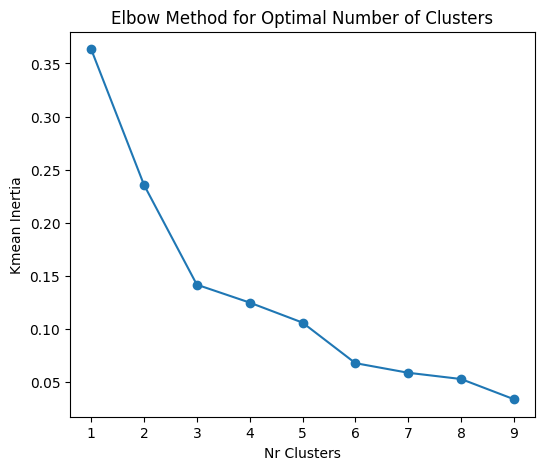

[2 5 2 4 3 2 2 2 1 1 1 0 2 0 0 4 5 1 0 0 0 0 1 2 2 1 1]
Cluster 0:
['NOORDWK70', 'ROTTMPT50', 'ROTTMPT70', 'TERSLG100', 'TERSLG135', 'TERSLG175', 'TERSLG235']
7

Cluster 1:
['NOORDWK10', 'NOORDWK2', 'NOORDWK20', 'TERSLG10', 'TERSLG4', 'WALCRN20', 'WALCRN70']
7

Cluster 2:
['DANTZGT', 'GOERE6', 'HUIBGOT', 'LODSGT', 'MARSDND', 'ROTTMPT3', 'VLISSGBISSVH', 'WALCRN2']
8

Cluster 3:
['HANSWGL']
1

Cluster 4:
['GROOTGND', 'SCHAARVODDL']
2

Cluster 5:
['DREISR', 'SOELKKPDOT']
2



,PCA Component 1,PCA Component 2,PCA Component 3,Cluster,Cluster Name,Location
0,-0.064071,-0.050036,-0.039904,2,Coastal,DANTZGT
1,-0.008509,-0.068730,0.110121,5,Lakes,DREISR
2,-0.021927,-0.041272,-0.027130,2,Coastal,GOERE6
3,-0.193374,0.084362,0.027162,4,Real Estuaries,GROOTGND
4,-0.127993,0.007283,-0.034704,3,Coastal/Estuary,HANSWGL
5,-0.030924,-0.034546,-0.019954,2,Coastal,HUIBGOT
6,-0.047579,-0.075076,0.003416,2,Coastal,LODSGT
7,-0.015816,-0.037138,-0.022360,2,Coastal,MARSDND
8,0.028989,-0.024335,-0.002555,1,Offshore,NOORDWK10
9,-0.003479,-0.036881,-0.009682,1,Offshore,NOORDWK2


    PCA Component 1  PCA Component 2  PCA Component 3 Cluster  \
0         -0.064071        -0.050036        -0.039904       2   
1         -0.008509        -0.068730         0.110121       5   
2         -0.021927        -0.041272        -0.027130       2   
3         -0.193374         0.084362         0.027162       4   
4         -0.127993         0.007283        -0.034704       3   
5         -0.030924        -0.034546        -0.019954       2   
6         -0.047579        -0.075076         0.003416       2   
7         -0.015816        -0.037138        -0.022360       2   
8          0.028989        -0.024335        -0.002555       1   
9         -0.003479        -0.036881        -0.009682       1   
10         0.042066        -0.011425        -0.004004       1   
11         0.093398         0.043590        -0.017229       0   
12        -0.028601        -0.040106        -0.027605       2   
13         0.088596         0.020496        -0.000883       0   
14         0.089069      

In [66]:
plot_inertia(10)

n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(feature_vecs)
labels = kmeans.labels_
print(labels)

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(feature_vecs)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# colors = ['r', 'g', 'b', 'y', 'c', 'm']
# for i in range(n_clusters):
#     ax.scatter(reduced_features[labels == i, 0], reduced_features[labels == i, 1], reduced_features[labels == i, 2], 
#                color=colors[i], label=f'Cluster {i}')

# ax.set_xlabel('PCA Component 1')
# ax.set_ylabel('PCA Component 2')
# ax.set_zlabel('PCA Component 3')
# ax.legend()
# plt.title('K-means Clustering')
# plt.show()

location_clusters = []

for i in range(n_clusters):
    location_cluster = [locations[j] for j in range(len(labels)) if labels[j] == i]
    location_clusters.append(location_cluster)
    print(f"Cluster {i}:")
    print(location_cluster)
    print(len(location_cluster))
    print()

color_dict = {"Open Sea": "#260f26", "Offshore": "#404e7c", "Coastal": "#357ded", "Coastal/Estuary": "#71b48d", "Real Estuaries": "#32e875", "Lakes": "#56eef4"}


cluster_name_map = {"0": "Open Sea", "1": "Offshore", "2": "Coastal", "3": "Coastal/Estuary", "4": "Real Estuaries", "5": "Lakes"}



df = pd.DataFrame(reduced_features, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])
df['Cluster'] = labels.astype(str)
df['Cluster Name'] = df['Cluster'].map(cluster_name_map)

df['Location'] = normalized_phyto.index
display(df)
print(df)
fig = px.scatter_3d(df, x='PCA Component 1', y='PCA Component 2', z='PCA Component 3', color='Cluster Name', color_discrete_map = color_dict, hover_name='Location', height=600, width=900)

fig.update_layout(margin=dict(l=0, r=0, b=20, t=0), legend=dict(y=0.5))

fig.show()


Cluster 0: Open Sea
Cluster 1: Offshore
Cluster 2: Coastal
Cluster 3: Coastal/Estuary
Cluster 4: Real Estuaries
Cluster 5: Lakes


In [34]:
# plot_inertia(10)

# n_clusters = 9
# kmeans = KMeans(n_clusters=n_clusters, random_state=0)
# kmeans.fit(feature_vecs)
# labels = kmeans.labels_
# print(labels)

# pca = PCA(n_components=3)
# reduced_features = pca.fit_transform(feature_vecs)

# # fig = plt.figure()
# # ax = fig.add_subplot(111, projection='3d')

# # colors = ['r', 'g', 'b', 'y', 'c', 'm']
# # for i in range(n_clusters):
# #     ax.scatter(reduced_features[labels == i, 0], reduced_features[labels == i, 1], reduced_features[labels == i, 2], 
# #                color=colors[i], label=f'Cluster {i}')

# # ax.set_xlabel('PCA Component 1')
# # ax.set_ylabel('PCA Component 2')
# # ax.set_zlabel('PCA Component 3')
# # ax.legend()
# # plt.title('K-means Clustering')
# # plt.show()

# location_clusters = []

# for i in range(n_clusters):
#     location_cluster = [locations[j] for j in range(len(labels)) if labels[j] == i]
#     location_clusters.append(location_cluster)
#     print(f"Cluster {i}:")
#     print(location_cluster)
#     print(len(location_cluster))
#     print()


# df = pd.DataFrame(reduced_features, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])
# df['Cluster'] = labels.astype(str)

# df['Location'] = normalized_phyto.index
# fig = px.scatter_3d(df, x='PCA Component 1', y='PCA Component 2', z='PCA Component 3', color='Cluster', hover_name='Location')

# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

# fig.show()


In [35]:
display(location_clusters)

[['NOORDWK70',
  'ROTTMPT50',
  'ROTTMPT70',
  'TERSLG100',
  'TERSLG135',
  'TERSLG175',
  'TERSLG235'],
 ['NOORDWK10',
  'NOORDWK2',
  'NOORDWK20',
  'TERSLG10',
  'TERSLG4',
  'WALCRN20',
  'WALCRN70'],
 ['DANTZGT',
  'GOERE6',
  'HUIBGOT',
  'LODSGT',
  'MARSDND',
  'ROTTMPT3',
  'VLISSGBISSVH',
  'WALCRN2'],
 ['HANSWGL'],
 ['GROOTGND', 'SCHAARVODDL'],
 ['DREISR', 'SOELKKPDOT']]

In [46]:
clustered_dfs = {}
for i, group in enumerate(location_clusters):
    mask = normalized_phyto.index.isin(group)
    clustered_dfs[i] = normalized_phyto[mask]


clustered_dfs[4]

,Agl,Dbr,Ezo,Gde,Oau,Omo,Orh,Osi,Ram,Rse,Tec,Tle,Tni,Tro,Dle,Etr,Gfl,Gsp,Nsc,Pbi,Pbr,Pha,Stu,Kgl,Oro,Tor,Cdi,Cra,Ore,Ata,Cfu,Cgr,Lan,Pcl,Pmi,Pos,Pse,Cden,Aco,Dip,Csu,Mnu,Pco,Cdeb,Cwa,Pba,Dac,Ptr,Lun,Nsi,Rst,Pst,Acn,Tno,Ccu,Pan,Gfa,Hta,Dsp,Psu,Cei,Ndi,Cda,Dro,Cha,Pac,Cau,Coc,Pte,Edu,Mpe,Pde,Plo,Dpu,Rte,Fja,Hak,Mhe,Dno,Dat
LOC_CODE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GROOTGND,0.017866,0.027108,0.003470,0.022950,0.085994,0.002183,0.001199,0.008982,0.013127,0.074094,0.010604,0.021227,0.040979,0.006881,0.000588,0.039614,0.000149,0.002872,0.001013,0.001528,0.000313,0.016178,0.00047,0.001187,0.003568,0.000851,0.000586,0.000533,0.004996,0.000000,0.0,0.000304,0.001025,0.000097,0.002237,0.002782,0.002887,0.000297,0.002769,0.080988,0.100660,0.119432,0.000563,0.003496,0.001041,0.000336,0.000000,0.000862,0.009987,0.024143,0.000624,0.000145,0.008051,0.003066,0.000438,0.001828,0.073312,0.002529,0.000723,0.000194,0.0,0.004285,0.009410,0.000324,0.0,0.006438,0.0,0.0,0.011056,0.095255,0.000000,0.0,0.001488,0.000000,0.0,0.000950,0.000000,0.014869,0.0,0.0
SCHAARVODDL,0.013555,0.030460,0.004972,0.037306,0.048525,0.001921,0.002334,0.010739,0.102016,0.028361,0.022327,0.005170,0.066618,0.007149,0.000000,0.045606,0.000559,0.002747,0.000237,0.002698,0.001575,0.017361,0.00000,0.002657,0.003682,0.000618,0.000530,0.006258,0.003293,0.000237,0.0,0.002891,0.000360,0.000000,0.002262,0.004426,0.003508,0.000000,0.009194,0.010135,0.198799,0.111337,0.000000,0.001741,0.000000,0.003927,0.000334,0.001943,0.002820,0.006758,0.000000,0.000000,0.060914,0.000000,0.009519,0.000529,0.011859,0.000000,0.000000,0.000378,0.0,0.000444,0.011592,0.000000,0.0,0.025958,0.0,0.0,0.001675,0.042384,0.000481,0.0,0.001555,0.000924,0.0,0.001196,0.000648,0.000000,0.0,0.0


In [48]:
df = clustered_dfs[2]
absent_species = df.columns[(df <= 0.001).all()].tolist()
print(absent_species)

clustered_dfs[2].sum(axis=1)

['Ata', 'Dno', 'Dat']


LOC_CODE
DANTZGT         1.0
GOERE6          1.0
HUIBGOT         1.0
LODSGT          1.0
MARSDND         1.0
ROTTMPT3        1.0
VLISSGBISSVH    1.0
WALCRN2         1.0
dtype: float64

In [55]:
absent_species

for cluster in clustered_dfs:
    df = clustered_dfs[cluster]
    absent_species = df.columns[(df <= 0.001).all()].tolist()

    print(cluster, absent_species)

0 ['Mnu', 'Lun', 'Gfa']
1 ['Gfa', 'Dno', 'Dat']
2 ['Ata', 'Dno', 'Dat']
3 ['Dle', 'Pbr', 'Ata', 'Cfu', 'Dac', 'Nsi', 'Rst', 'Pst', 'Dsp', 'Cei', 'Ndi', 'Dro', 'Cau', 'Mpe', 'Pde', 'Hak', 'Mhe', 'Dno', 'Dat']
4 ['Dle', 'Gfl', 'Stu', 'Tor', 'Cdi', 'Ata', 'Cfu', 'Pcl', 'Cden', 'Pco', 'Dac', 'Rst', 'Pst', 'Dsp', 'Psu', 'Cei', 'Dro', 'Cha', 'Cau', 'Coc', 'Mpe', 'Pde', 'Dpu', 'Rte', 'Hak', 'Dno', 'Dat']
5 ['Orh', 'Ram', 'Tec', 'Tle', 'Stu', 'Ore', 'Ata', 'Cfu', 'Aco', 'Rst', 'Pan', 'Hta', 'Cei', 'Ndi', 'Dro', 'Cau', 'Pde', 'Rte', 'Mhe', 'Dno', 'Dat']


In [39]:
cluster_name_map = {"0": "Open Sea", "1": "Offshore", "2": "Coastal", "3": "Coastal/Estuary", "4": "Real Estuaries", "5": "Lakes"}


## FASTDTW

In [40]:
import pandas as pd
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'fastdtw'

In [ ]:
data = pd.read_excel('../data/MERGED_DATA_INTERPOLATED2.xlsx')

In [ ]:
# phytoplankton_columns = ['Agl', 'Dbr', 'Ezo', 'Gde', 'Oau', 'Omo', 'Orh']  # subset

phytoplankton_columns=['Agl', 'Dbr', 'Ezo', 'Gde', 'Oau', 'Omo', 'Orh', 'Osi', 'Ram', 'Rse',
       'Tec', 'Tle', 'Tni', 'Tro', 'Dle', 'Etr', 'Gfl', 'Gsp', 'Nsc', 'Pbi',
       'Pbr', 'Pha', 'Stu', 'Kgl', 'Oro', 'Tor', 'Cdi', 'Cra', 'Ore', 'Ata',
       'Cfu', 'Cgr', 'Lan', 'Pcl', 'Pmi', 'Pos', 'Pse', 'Cden', 'Aco', 'Dip',
       'Csu', 'Mnu', 'Pco', 'Cdeb', 'Cwa', 'Pba', 'Dac', 'Ptr', 'Lun', 'Nsi',
       'Rst', 'Pst', 'Acn', 'Tno', 'Ccu', 'Pan', 'Gfa', 'Hta', 'Dsp', 'Psu',
       'Cei', 'Ndi', 'Cda', 'Dro', 'Cha', 'Pac', 'Cau', 'Coc', 'Pte', 'Edu',
       'Mpe', 'Pde', 'Plo', 'Dpu', 'Rte', 'Fja', 'Hak', 'Mhe', 'Dno', 'Dat']

abiotic_factors = [
    'ZS [mg/l]', 'T [oC]', 'SiO2 [umol/L]', 'SALNTT [DIMSLS]', 'PO4 [umol/L]', 'pH [DIMSLS]',
    'NO3 [umol/L]', 'NO2 [umol/L]', 'NH4 [umol/L]', 'E [/m]', 'CHLFa [ug/l]', '    Q', 'PAR [J/m2d]', 'PAR [kJ/m2d]',
    'kPAR_7d', 'kPAR_14d', 'DIN', 'DIN:SRP', 'DIN:SI', 'SRP:SI', 'IM [Jm2d]'
]

In [ ]:
# Extract time series data for each phytoplankton type
time_series_data = [data[phytoplankton].dropna().values for phytoplankton in phytoplankton_columns]

df_abiotic_factors = data[abiotic_factors].copy()
# df_abiotic_factors.fillna(df_abiotic_factors.mean(), inplace=True)

# Convert abiotic factors to tensor for DTW computation
abiotic_data_tensor = df_abiotic_factors.values

phytoplankton_similarity_matrix = np.zeros((len(time_series_data), len(time_series_data)))


In [ ]:
for i, series1 in enumerate(time_series_data):
    for j, series2 in enumerate(time_series_data):
        if i < j:
            distance, path = fastdtw(series1, series2)
            phytoplankton_similarity_matrix[i, j] = distance
            phytoplankton_similarity_matrix[j, i] = distance
        print(f"Pair ({i}, {j}) done - {int((i * len(time_series_data) + j) / ((len(time_series_data))**2) * 100)}%")


Pair (0, 0) done - 0%
Pair (0, 1) done - 0%
Pair (0, 2) done - 0%
Pair (0, 3) done - 0%
Pair (0, 4) done - 0%
Pair (0, 5) done - 0%
Pair (0, 6) done - 0%
Pair (0, 7) done - 0%
Pair (0, 8) done - 0%
Pair (0, 9) done - 0%
Pair (0, 10) done - 0%
Pair (0, 11) done - 0%
Pair (0, 12) done - 0%
Pair (0, 13) done - 0%
Pair (0, 14) done - 0%
Pair (0, 15) done - 0%
Pair (0, 16) done - 0%
Pair (0, 17) done - 0%
Pair (0, 18) done - 0%
Pair (0, 19) done - 0%
Pair (0, 20) done - 0%
Pair (0, 21) done - 0%
Pair (0, 22) done - 0%
Pair (0, 23) done - 0%
Pair (0, 24) done - 0%
Pair (0, 25) done - 0%
Pair (0, 26) done - 0%
Pair (0, 27) done - 0%
Pair (0, 28) done - 0%
Pair (0, 29) done - 0%
Pair (0, 30) done - 0%
Pair (0, 31) done - 0%
Pair (0, 32) done - 0%
Pair (0, 33) done - 0%
Pair (0, 34) done - 0%
Pair (0, 35) done - 0%
Pair (0, 36) done - 0%
Pair (0, 37) done - 0%
Pair (0, 38) done - 0%
Pair (0, 39) done - 0%
Pair (0, 40) done - 0%
Pair (0, 41) done - 0%
Pair (0, 42) done - 0%
Pair (0, 43) done - 0

/tmp/ipykernel_4474/1450431826.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(phytoplankton_similarity_matrix, method='single')


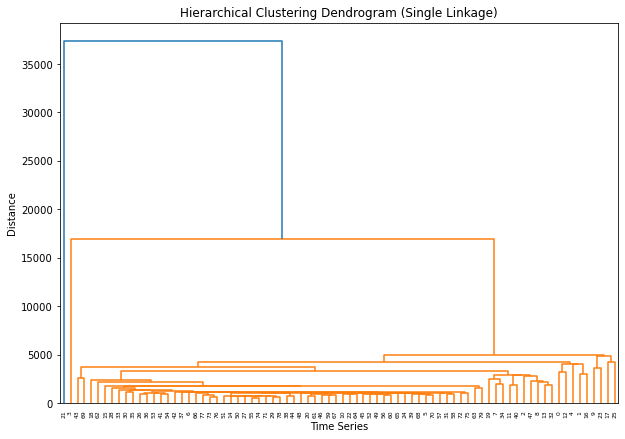

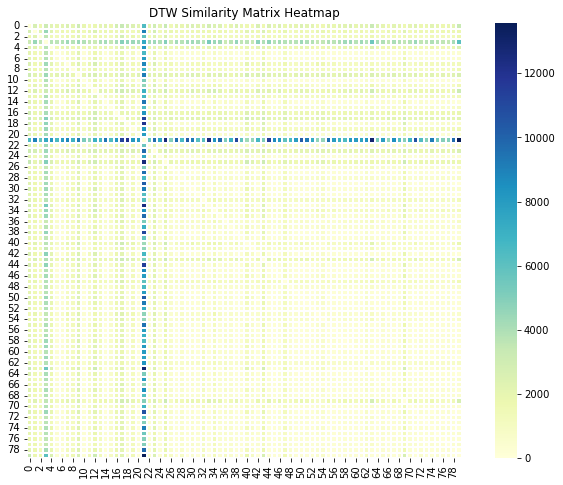

In [ ]:
# Perform hierarchical clustering using the distance matrix
# Single-linkage clustering
linked = linkage(phytoplankton_similarity_matrix, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=np.arange(len(time_series_data)))
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Time Series')
plt.ylabel('Distance')
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(phytoplankton_similarity_matrix, square=True, linewidths=0.1, cmap="YlGnBu", ax=ax)
plt.title('DTW Similarity Matrix Heatmap')
plt.show()

In [ ]:
kmeans_model = KMeans(n_clusters = 3)
clusters = kmeans_model.fit_predict(phytoplankton_similarity_matrix)
print(clusters)

cluster_lists = [[] for _ in range(3)]
for i, cluster in enumerate(clusters):
 #  print(i, phytoplankton_columns[i], cluster)
    cluster_lists[cluster].append(phytoplankton_columns[i])

for i, cluster in enumerate(cluster_lists):
    print(f"Cluster {i}: {cluster}")


[2 2 2 2 2 0 0 0 0 2 0 0 2 0 0 0 2 2 0 0 0 1 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0]
Cluster 0: ['Omo', 'Orh', 'Osi', 'Ram', 'Tec', 'Tle', 'Tro', 'Dle', 'Etr', 'Nsc', 'Pbi', 'Pbr', 'Stu', 'Oro', 'Cdi', 'Cra', 'Ore', 'Ata', 'Cfu', 'Cgr', 'Lan', 'Pcl', 'Pmi', 'Pos', 'Pse', 'Cden', 'Aco', 'Dip', 'Csu', 'Mnu', 'Pco', 'Cwa', 'Pba', 'Dac', 'Ptr', 'Lun', 'Nsi', 'Rst', 'Pst', 'Acn', 'Tno', 'Ccu', 'Pan', 'Gfa', 'Hta', 'Dsp', 'Psu', 'Cei', 'Ndi', 'Cda', 'Dro', 'Cha', 'Pac', 'Cau', 'Coc', 'Pte', 'Mpe', 'Pde', 'Plo', 'Dpu', 'Rte', 'Fja', 'Hak', 'Mhe', 'Dno', 'Dat']
Cluster 1: ['Pha']
Cluster 2: ['Agl', 'Dbr', 'Ezo', 'Gde', 'Oau', 'Rse', 'Tni', 'Gfl', 'Gsp', 'Kgl', 'Tor', 'Cdeb', 'Edu']


/home/milan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
sil_score = silhouette_score(phytoplankton_similarity_matrix, clusters, metric="precomputed")
db_index = davies_bouldin_score(phytoplankton_similarity_matrix, clusters)
ch_score = calinski_harabasz_score(phytoplankton_similarity_matrix, clusters)

print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Index: {db_index}')
print(f'Calinski-Harabasz Index: {ch_score}')

Silhouette Score: 0.5391066061504406
Davies-Bouldin Index: 0.5190808127474345
Calinski-Harabasz Index: 151.59948076290186
